# ADV Experiment **1**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


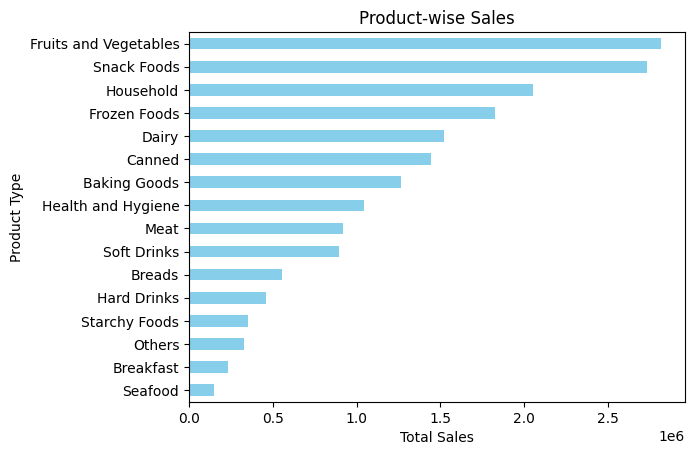

In [13]:
product_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values()

product_sales.plot(kind='barh', title='Product-wise Sales', color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product Type')
plt.show()


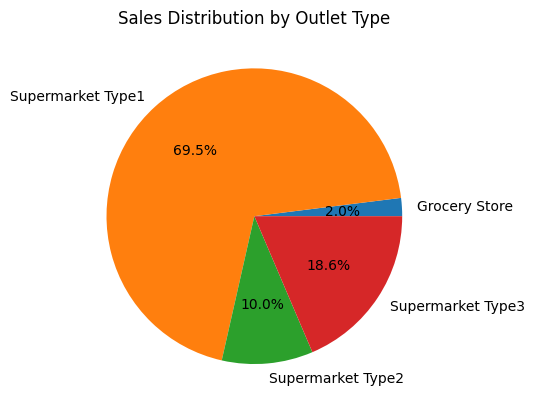

In [14]:
outlet_sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

outlet_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales Distribution by Outlet Type', ylabel='')
plt.show()


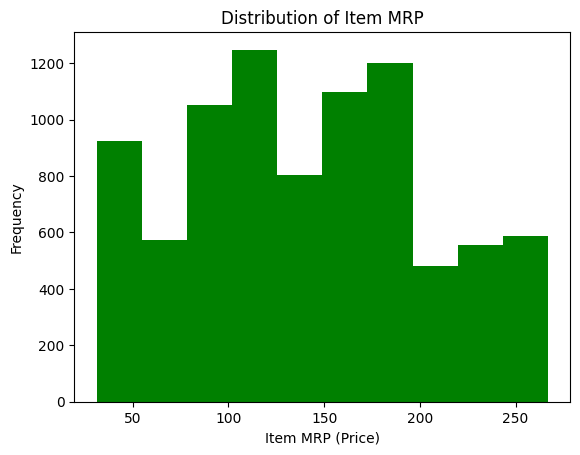

In [15]:
plt.hist(df['Item_MRP'], bins=10, color='green')
plt.title('Distribution of Item MRP')
plt.xlabel('Item MRP (Price)')
plt.ylabel('Frequency')
plt.show()


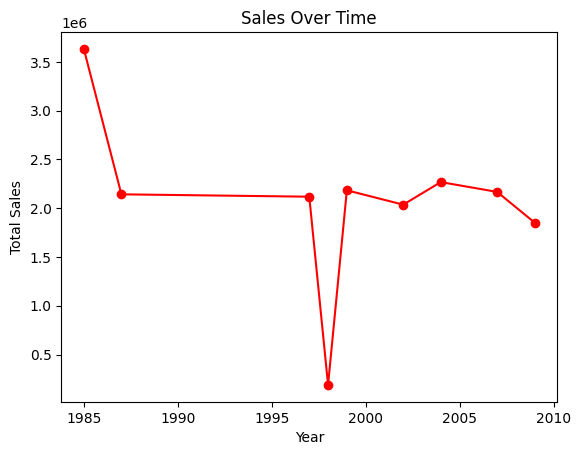

In [16]:
df['Outlet_Establishment_Year'] = pd.to_datetime(df['Outlet_Establishment_Year'], format='%Y')

sales_over_time = df.groupby(df['Outlet_Establishment_Year'].dt.year)['Item_Outlet_Sales'].sum()
sales_over_time.plot(marker='o', title='Sales Over Time', color='red')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


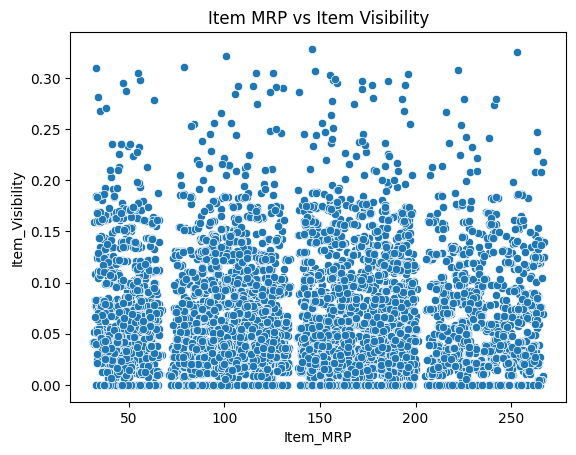

In [17]:
sns.scatterplot(x='Item_MRP', y='Item_Visibility', data=df)
plt.title('Item MRP vs Item Visibility')
plt.show()


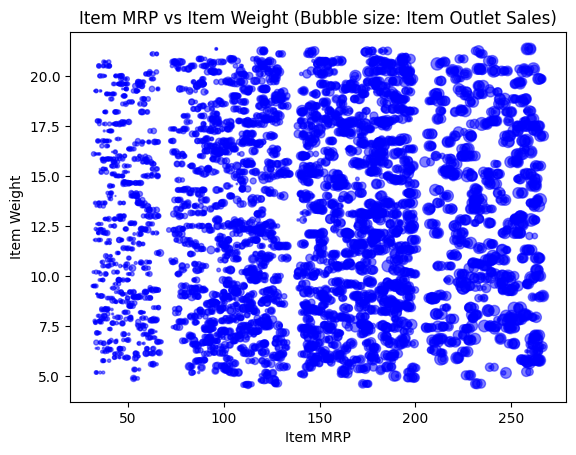

In [18]:
plt.scatter(df['Item_MRP'], df['Item_Weight'], s=df['Item_Outlet_Sales']*0.01, alpha=0.5, color='blue')
plt.title('Item MRP vs Item Weight (Bubble size: Item Outlet Sales)')
plt.xlabel('Item MRP')
plt.ylabel('Item Weight')
plt.show()


In [19]:
print("Product-wise Sales:")
print(product_sales)


Product-wise Sales:
Item_Type
Seafood                  1.488682e+05
Breakfast                2.322990e+05
Others                   3.255176e+05
Starchy Foods            3.514013e+05
Hard Drinks              4.577934e+05
Breads                   5.532372e+05
Soft Drinks              8.928977e+05
Meat                     9.175656e+05
Health and Hygiene       1.045200e+06
Baking Goods             1.265525e+06
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Household                2.055494e+06
Snack Foods              2.732786e+06
Fruits and Vegetables    2.820060e+06
Name: Item_Outlet_Sales, dtype: float64


In [20]:
region_sales = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values()

print("Region-wise Sales:")
print(region_sales)


Region-wise Sales:
Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64
